<a href="https://colab.research.google.com/github/Sanket758/Machine-Learning-Projects/blob/master/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Univariate Linear Regression </h2>

### Task 1: Load the Data and Libraries
---

In [0]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [0]:
data = pd.read_csv('bike_sharing_data.txt')

In [77]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Task 2: Visualize the Data
---

Text(0.5, 1.0, 'Population vs Profit')

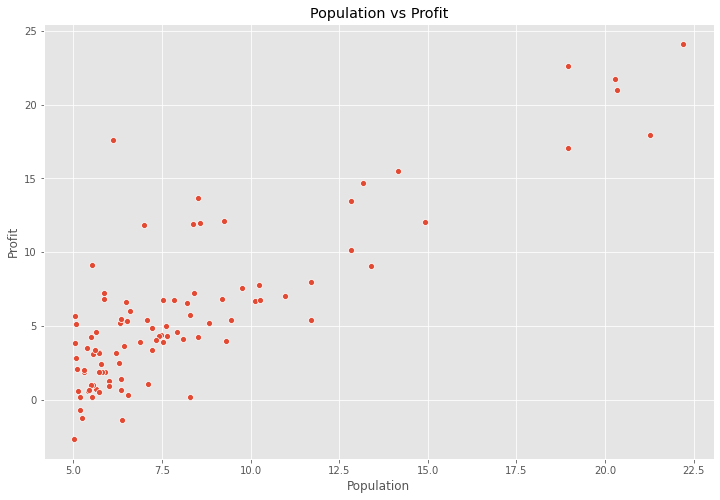

In [78]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Population vs Profit')

### Task 3: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [0]:
def compute_cost(X,y, theta):
  m = len(y)
  y_hat = X.dot(theta)
  error = (y_hat - y) ** 2
  return (1 / (2*m)) * np.sum(error)

In [80]:
m = data.Profit.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))
compute_cost(X,y, theta)

32.072733877455676

### Task 4: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [0]:
def gradient_descent(X,y, theta, alpha, n_iter):
  m = len(y)
  costs = []
  for i in range(n_iter):
    y_hat = X.dot(theta)
    error = np.dot(X.T, (y_hat-y))
    theta -= alpha * (1/m) * error
    costs.append(compute_cost(X,y,theta))
  return theta, costs

In [0]:
theta, costs = gradient_descent(X,y, theta, alpha=0.01, n_iter=2000)

In [83]:
print('h(x)= {} + {}x1'.format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x)= -3.79 + 1.18x1


### Task 5: Visualising the Cost Function $J(\theta)$
---

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array(theta_0[i], theta_1[j])
    cost_values[i,j] = compute_cost(X,y,t)

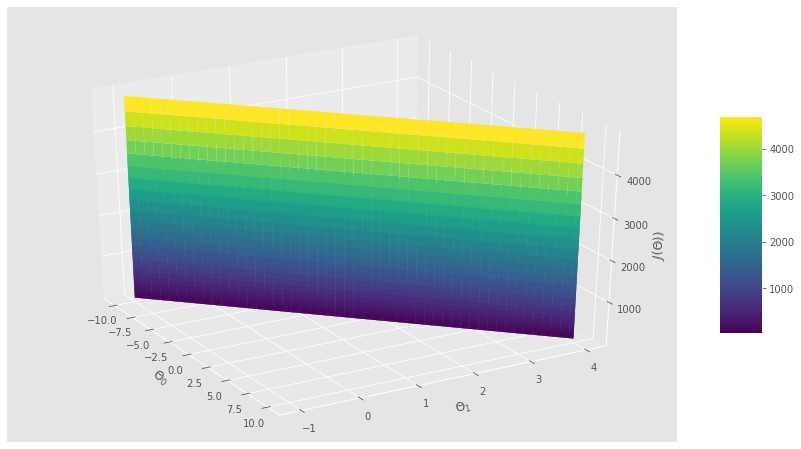

In [88]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$)')
ax.view_init(30,330)
plt.show()

### Task 6: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

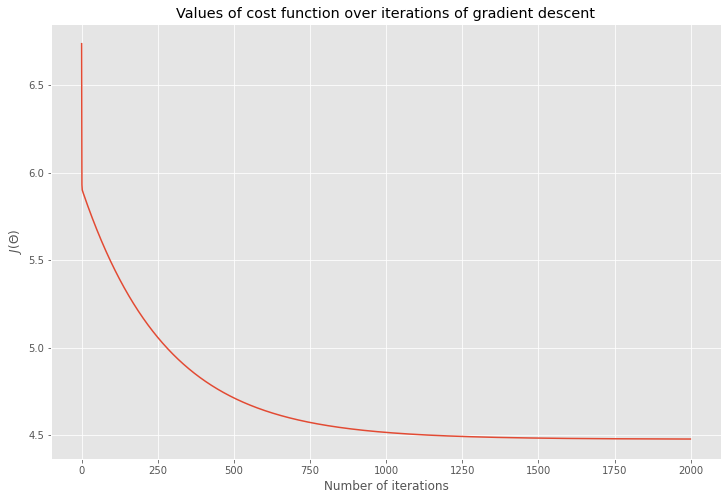

In [89]:
plt.plot(costs)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of cost function over iterations of gradient descent')

### Task 7: Training Data with Linear Regression Fit
---

In [91]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [93]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


Text(0.5, 1.0, 'Linear Regression')

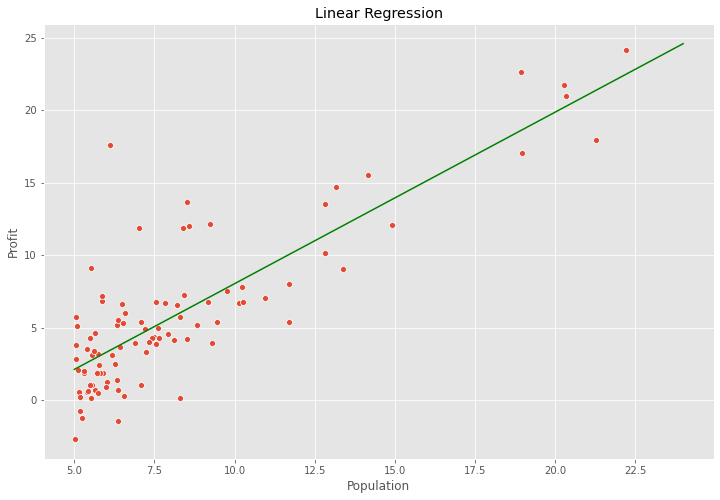

In [95]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5,25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value, c='g')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression')

### Task 8: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [0]:
def predict(x, theta):
  y_hat = np.dot(theta.T, x)
  return y_hat

In [100]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print('For population of 40000 people, model predicts profit of $',str(round(y_pred_1))) 

For population of 40000 people, model predicts profit of $ 9408.0


In [101]:
y_pred_2 = predict(np.array([1,8.5]), theta) * 10000
print('For population of 85000 people, model predicts profit of $',str(round(y_pred_2))) 

For population of 85000 people, model predicts profit of $ 62607.0
